In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [85]:
df = pd.read_csv("virat.csv", parse_dates=True)

In [86]:
df['Start_Date']=df['Start Date']

In [88]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [91]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

In [90]:
df.set_index('Start Date')

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start_Date
Start Date,,,,,,,,,,,,
2008-08-18,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
2008-08-20,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2008-08-24,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
2008-08-27,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
2008-08-29,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-26,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,26-Oct-16
2016-10-29,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16
2017-01-15,122,147,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17


In [93]:
df['year'] = pd.DatetimeIndex(df['Start_Date']).year

#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [96]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Start_Date,year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,2008-08-18,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,2008-08-20,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,2008-08-24,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,2008-08-27,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,2008-08-29,2008


In [107]:
df[df.year==2017]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Start_Date,year
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,2017-01-15,2017-01-15,2017
130,8,6,5,2,0,160,3,caught,1,v England,Cuttack,2017-01-19,2017-01-19,2017
131,55,81,63,8,0,87.3,3,caught,2,v England,Kolkata,2017-01-22,2017-01-22,2017


In [108]:
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)


DataError: No numeric types to aggregate

In [114]:
## Your code here
df.Runs = df.Runs.apply(lambda x: x[:-1] if x[-1]=="*" else x)
df.Runs = df.Runs.astype("int32")
df.Runs.value_counts()



0      10
2       6
1       5
9       4
31      4
       ..
139     1
53      1
49      1
45      1
55      1
Name: Runs, Length: 75, dtype: int64

In [72]:
df.describe()

df['Runs'].describe(percentiles = [0.25,0.5,1]) 


count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
100%     154.000000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


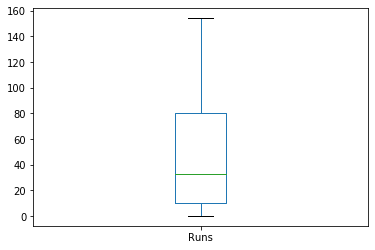

In [73]:
#Your code here
df.Runs.plot.box()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [109]:
df['Start Date']= df['Start Date'].apply(lambda x: (x[-2:]))
df['Start Date'].value_counts()
pd.pivot_table(df, values='Runs',columns=['Start_Date'], aggfunc=np.mean)
pd.pivot_table(df, values='Runs',columns=['Start_Date'], aggfunc=np.max)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Start_Date,year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,2008-08-18,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,2008-08-20,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,2008-08-24,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,2008-08-27,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,2008-08-29,2008


In [115]:
pd.pivot_table(df, values='Runs',columns=['Start_Date'], aggfunc=np.mean)

Start_Date,2008-08-18,2008-08-20,2008-08-24,2008-08-27,2008-08-29,2009-09-14,2009-10-25,2009-11-02,2009-12-15,2009-12-18,...,2016-01-20,2016-01-23,2016-10-16,2016-10-20,2016-10-23,2016-10-26,2016-10-29,2017-01-15,2017-01-19,2017-01-22
Runs,12,37,25,54,31,2,30,10,27,54,...,106,8,85,9,154,45,65,122,8,55


In [76]:
df.loc['2011-01-01':'2011-12-31']

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground
Start Date,,,,,,,,,,,
2011-01-12,54,122,70,2,1,77.14,3,caught,2,v South Africa,Durban
2011-01-15,22,43,34,1,0,64.7,3,run out,1,v South Africa,Johannesburg
2011-01-18,28,51,41,5,0,68.29,3,caught,2,v South Africa,Cape Town
2011-01-21,87,126,92,7,2,94.56,3,not out,2,v South Africa,Port Elizabeth
2011-01-23,2,11,6,0,0,33.33,3,caught,2,v South Africa,Centurion
2011-02-19,100,113,83,8,2,120.48,4,not out,1,v Bangladesh,Dhaka
2011-03-06,34,82,53,3,0,64.15,4,run out,2,v Ireland,Bengaluru
2011-03-09,12,16,20,2,0,60,5,bowled,2,v Netherlands,Delhi
2011-03-12,1,2,3,0,0,33.33,7,caught,1,v South Africa,Nagpur


In [74]:
#df['Start_Date']=df['Start Date']
df.dtypes


Runs           int32
Mins          object
BF             int64
4s             int64
6s             int64
SR            object
Pos            int64
Dismissal     object
Inns           int64
Opposition    object
Ground        object
dtype: object

#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [119]:
#Your code here
df.Mins = df.Mins.apply(lambda x: x.replace("-",""))

In [123]:
df = df[df.Mins!='']

In [124]:
df.Mins = df.Mins.astype('int32')

/Users/na250047/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [125]:
df.dtypes

Runs                   int32
Mins                   int32
BF                     int64
4s                     int64
6s                     int64
SR                    object
Pos                    int64
Dismissal             object
Inns                   int64
Opposition            object
Ground                object
Start Date    datetime64[ns]
Start_Date    datetime64[ns]
year                   int64
dtype: object

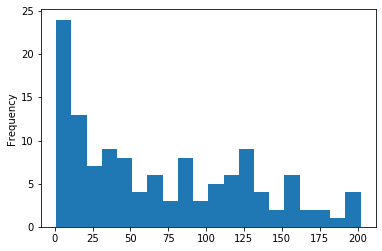

In [131]:
df.Mins.plot.hist(bins=20)

In [1]:
import pandas as pd
df_book = pd.read_csv('Book2.csv', sep=',')
df_book.head()


,Title,Type,Format,Year,Rating,Stars,Description
0,Enemy Behind,"War,Thriller",DVD,2003,PG,10,Talk about


In [19]:
def convert_row(row):
    return """<movie><title>%s</title>
    <type>%s</type>
    <format>%s</format>
    <year>%s</year>
    <rating>%s</rating>
    <stars>%s</stars>
    <description>%s</description>
</movie>""" % (
    row.Title, row.Type, row.Format, row.Year, row.Rating, row.Stars, row.Description)

t = '\n'.join(df_book.apply(convert_row, axis=1))
print(t)

<movie><title>Enemy Behind</title>
    <type>War,Thriller</type>
    <format>DVD</format>
    <year>2003</year>
    <rating>PG</rating>
    <stars>10</stars>
    <description>Talk about</description>
</movie>


In [20]:
type(t)

str

In [21]:
print('<abc>\n'+t+'\n</abc>')

<abc>
<movie><title>Enemy Behind</title>
    <type>War,Thriller</type>
    <format>DVD</format>
    <year>2003</year>
    <rating>PG</rating>
    <stars>10</stars>
    <description>Talk about</description>
</movie>
</abc>


In [22]:
f = open("abc.xml", "w")
f.write('<abc>\n'+t+'\n</abc>')
f.close()

In [24]:
import shutil
shutil.make_archive('a.','zip',root_dir=None,   # root for archive - current working dir if None
  base_dir=None)

'a..zip'

In [28]:
import os
from zipfile import ZipFile
def create_zipFile(sourceFilePath):
    for root, directories, files in os.walk(sourceFilePath): 
            for filename in files: 
                # join the two strings in order to form the full filepath. 
                filepath = os.path.join(root, filename) 

                print(filepath)
                if filename.startswith('_baselinesnap_'):
                    file_n, file_extension = os.path.splitext(filepath)
                    with ZipFile(file_n+'.zip','w') as zip: 
                        zip.write(filename)




./.DS_Store
./abc.xml
./Practice Exercise - Session 1.ipynb
./Book2.csv
./virat.csv
./Data+Dictionary-Cricket.csv
./.ipynb_checkpoints/Practice Exercise - Session 1-checkpoint.ipynb
